In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ks2_national_school_characteristics_2016_to_2023_provisional.csv")

In [3]:
data.shape

(440, 112)

In [4]:
data.head()

,time_period,time_identifier,geographic_level,country_code,country_name,version,breakdown_topic,breakdown,school_type,gender,...,pt_writta_early_development_of_expected_standard,pt_writta_foundations_of_expected_standard,pt_writta_engagement_model_or_below_pre_key_stage_standards,pt_writta_below_interim_pre_key_stage_standards,pt_writta_absent,pt_writta_disapplied,pt_scita_met_expected_standard,pt_scita_not_met_expected_standard,pt_scita_absent,pt_scita_disapplied
0,201516,Academic year,National,E92000001,England,Final,School cohort size,1 to 15 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,84,16,0,0
1,201516,Academic year,National,E92000001,England,Final,School cohort size,16 to 30 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,82,18,0,0
2,201516,Academic year,National,E92000001,England,Final,School cohort size,31 to 60 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,81,19,0,0
3,201516,Academic year,National,E92000001,England,Final,School cohort size,61 to 90 pupils,State-funded mainstream schools,Total,...,1,1,z,0,0,0,82,18,0,0
4,201516,Academic year,National,E92000001,England,Final,School cohort size,91+ pupils,State-funded mainstream schools,Total,...,1,0,z,0,0,0,83,16,0,0


In [6]:
data.replace(['z', 'c', 'x'], np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='ignore')


In [9]:
missing_values = data.isnull().sum().sum()
print("Total Missing Values:",missing_values)
print("data shape", data.shape)


Total Missing Values: 17275
data shape (440, 112)


In [10]:
# Filtering out the object columns for inspection
object_columns = data.select_dtypes(include=['object'])
object_columns_descriptions = {col: object_columns[col].unique() for col in object_columns.columns}

object_columns_descriptions



{'time_identifier': array(['Academic year'], dtype=object),
 'geographic_level': array(['National'], dtype=object),
 'country_code': array(['E92000001'], dtype=object),
 'country_name': array(['England'], dtype=object),
 'version': array(['Final', 'Provisional'], dtype=object),
 'breakdown_topic': array(['School cohort size', 'School phase', 'School religious character',
        'School type'], dtype=object),
 'breakdown': array(['1 to 15 pupils', '16 to 30 pupils', '31 to 60 pupils',
        '61 to 90 pupils', '91+ pupils', 'Junior', 'Middle', 'Other',
        'Primary', 'Church of England', 'Jewish', 'Methodist', 'Muslim',
        'No religious character', 'Other Christian faith',
        'Other religious character', 'Roman Catholic', 'Sikh',
        'Academies and free schools', 'All schools',
        'Alternative provision', 'Converter academies', 'Free schools',
        'Independent schools', 'LA maintained schools',
        'Sponsored academies', 'State-funded mainstream schools'

In [11]:
# percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# threshold for dropping columns
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data_reduced = data.drop(columns=columns_to_drop)

reduced_data_shape = data_reduced.shape
remaining_columns_missing_percentage = (data_reduced.isnull().sum() / len(data_reduced)) * 100
reduced_data_shape, remaining_columns_missing_percentage



((440, 82),
 time_period                            0.000000
 time_identifier                        0.000000
 geographic_level                       0.000000
 country_code                           0.000000
 country_name                           0.000000
                                         ...    
 pt_writta_absent                      25.681818
 pt_scita_met_expected_standard        25.681818
 pt_scita_not_met_expected_standard    25.681818
 pt_scita_absent                       25.681818
 pt_scita_disapplied                   25.681818
 Length: 82, dtype: float64)

In [9]:
data_reduced_cleaned = data_reduced.dropna()
reduced_cleaned_data_shape = data_reduced_cleaned.shape

reduced_cleaned_data_shape



(274, 82)

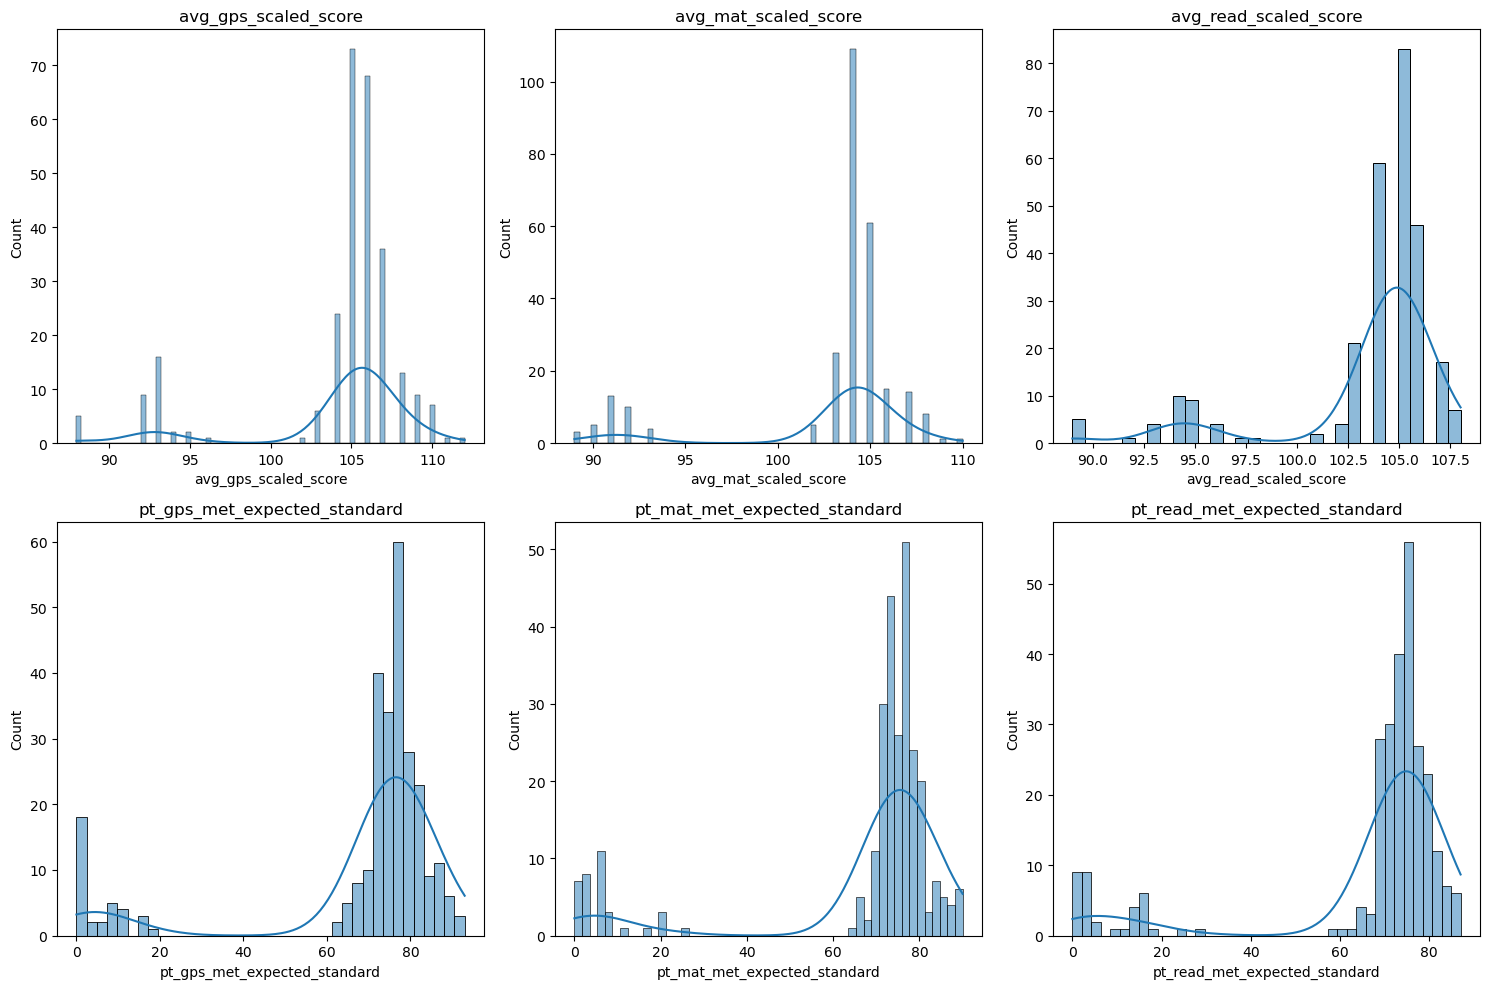

In [10]:
numerical_variables = [
    'avg_gps_scaled_score', 'avg_mat_scaled_score', 'avg_read_scaled_score', 
    'pt_gps_met_expected_standard', 'pt_mat_met_expected_standard', 'pt_read_met_expected_standard'
]

plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_reduced_cleaned[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()


* The distributions of average scaled scores appear to be relatively normal, but with some skewness.
* The percentages of pupils meeting the expected standard in various subjects show varying distributions, potentially indicating differences in performance levels across subjects.


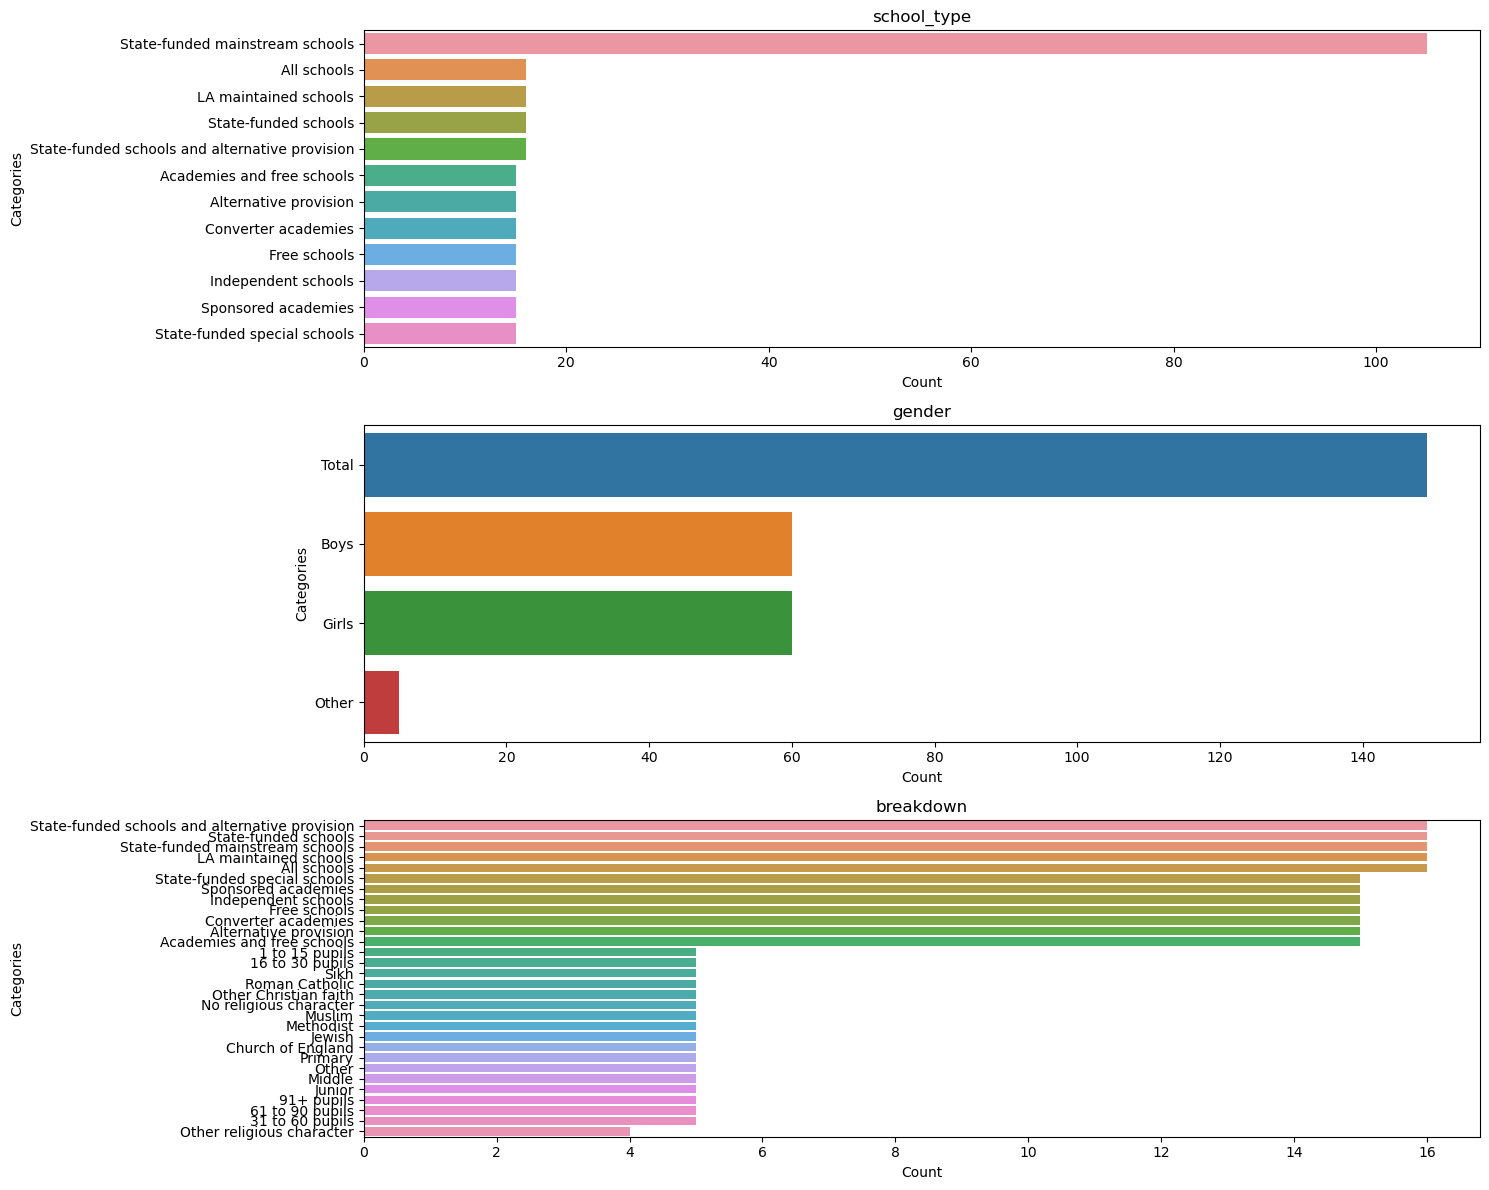

In [11]:
# Selecting categorical variables for analysis
categorical_variables = ['school_type', 'gender', 'breakdown']
plt.figure(figsize=(15, 12))

for i, var in enumerate(categorical_variables):
    plt.subplot(3, 1, i + 1)
    sns.countplot(y=data_reduced_cleaned[var], order = data_reduced_cleaned[var].value_counts().index)
    plt.title(var)
    plt.xlabel('Count')
    plt.ylabel('Categories')

plt.tight_layout()
plt.show()


* School Type Distribution: Certain school types are more prevalent in the dataset, which could influence the overall findings.

* Data Breakdown Categories: The frequency of different categories in 'breakdown' shows the diversity of the dataset in terms of these characteristics.

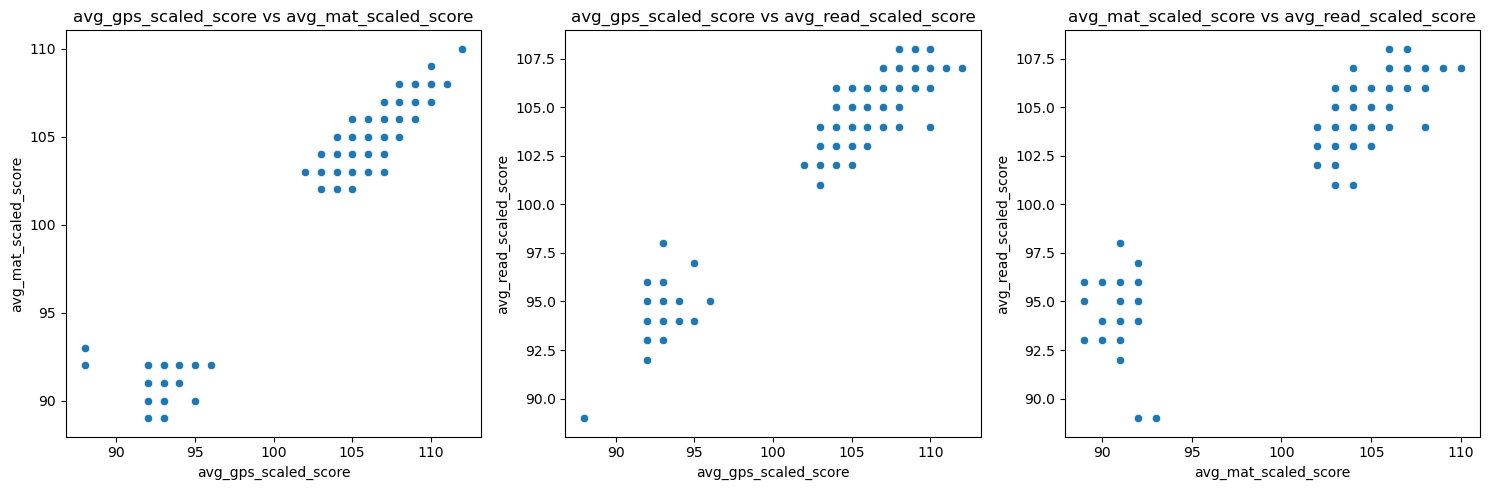

In [12]:
scatter_plot_pairs = [
    ('avg_gps_scaled_score', 'avg_mat_scaled_score'),
    ('avg_gps_scaled_score', 'avg_read_scaled_score'),
    ('avg_mat_scaled_score', 'avg_read_scaled_score')
]

plt.figure(figsize=(15, 5))

for i, (var1, var2) in enumerate(scatter_plot_pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=data_reduced_cleaned[var1], y=data_reduced_cleaned[var2])
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()


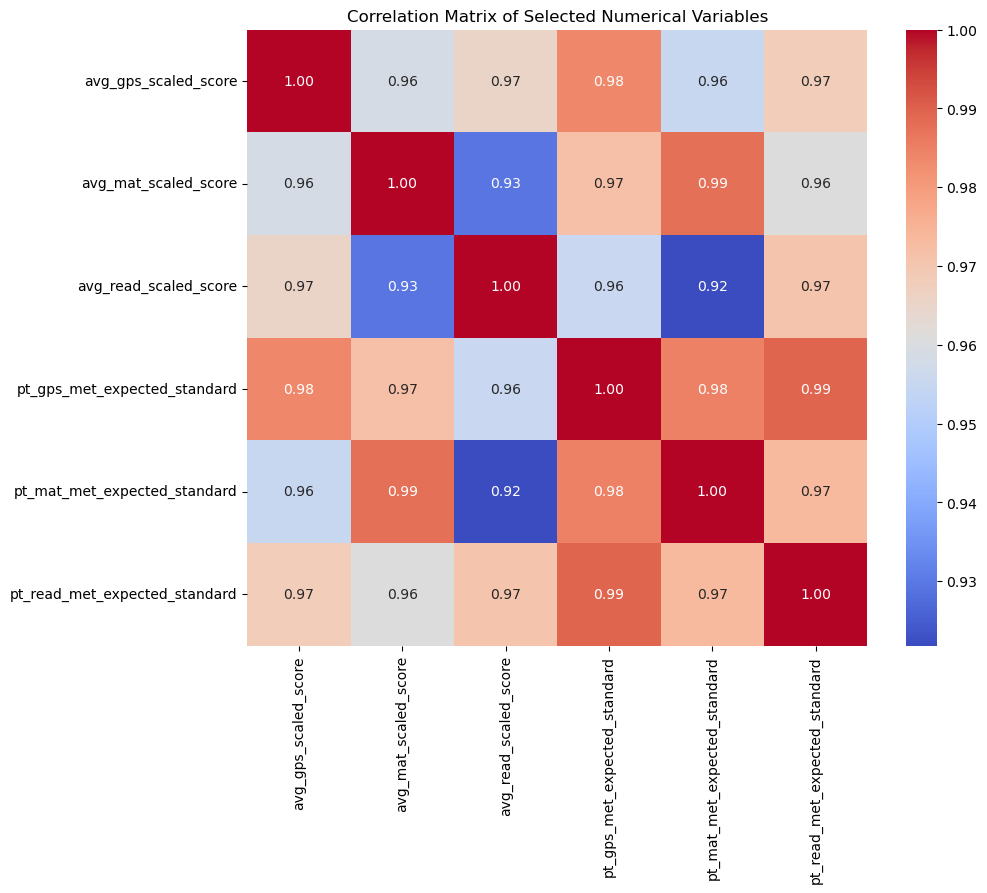

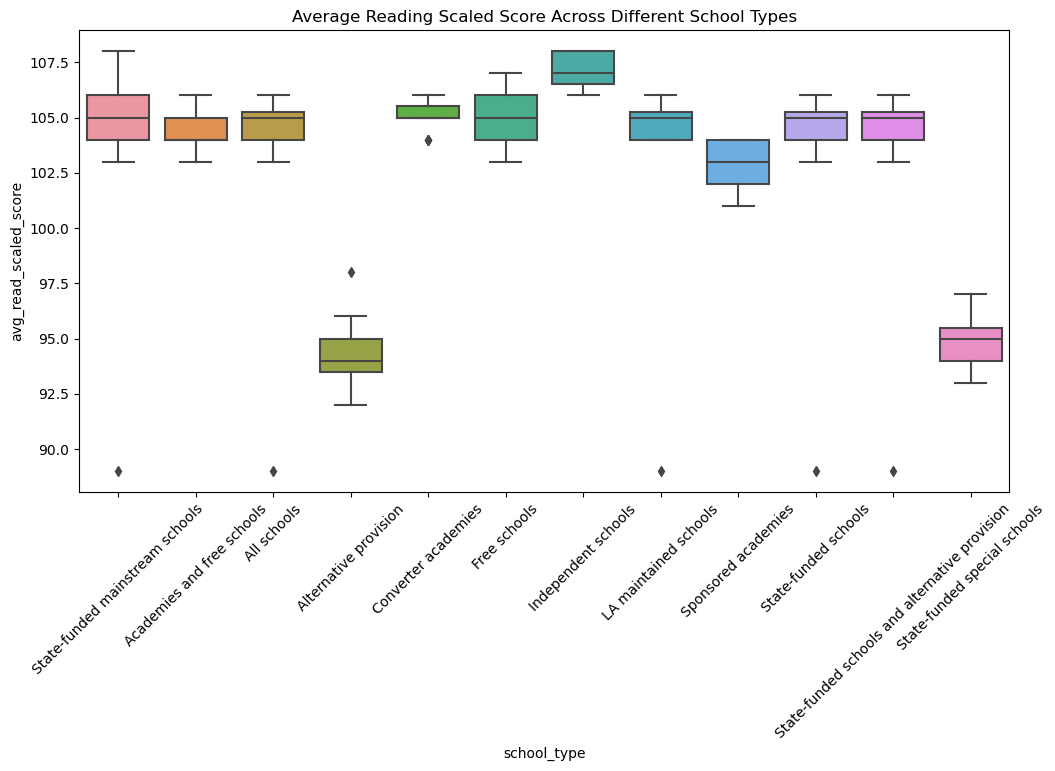

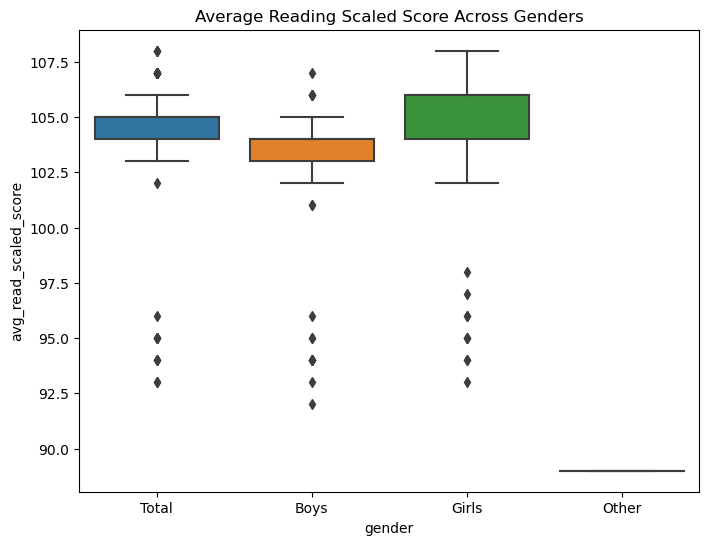

In [13]:
# Calculating the correlation matrix for the continuous variables
correlation_matrix = data_reduced_cleaned[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()

# Examining how average reading scaled score varies across different school types
plt.figure(figsize=(12, 6))
sns.boxplot(x='school_type', y='avg_read_scaled_score', data=data_reduced_cleaned)
plt.title("Average Reading Scaled Score Across Different School Types")
plt.xticks(rotation=45)
plt.show()

# Similar analysis for gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='avg_read_scaled_score', data=data_reduced_cleaned)
plt.title("Average Reading Scaled Score Across Genders")
plt.show()


* Variability Among School Types: There's noticeable variability in reading scores across different types of schools.
* Outliers and Spread: Some school types show a wider range of scores and outliers, indicating differences in performance levels within these categories.
* Gender Differences: There may be slight differences in reading scores between genders, but the median scores appear relatively close.

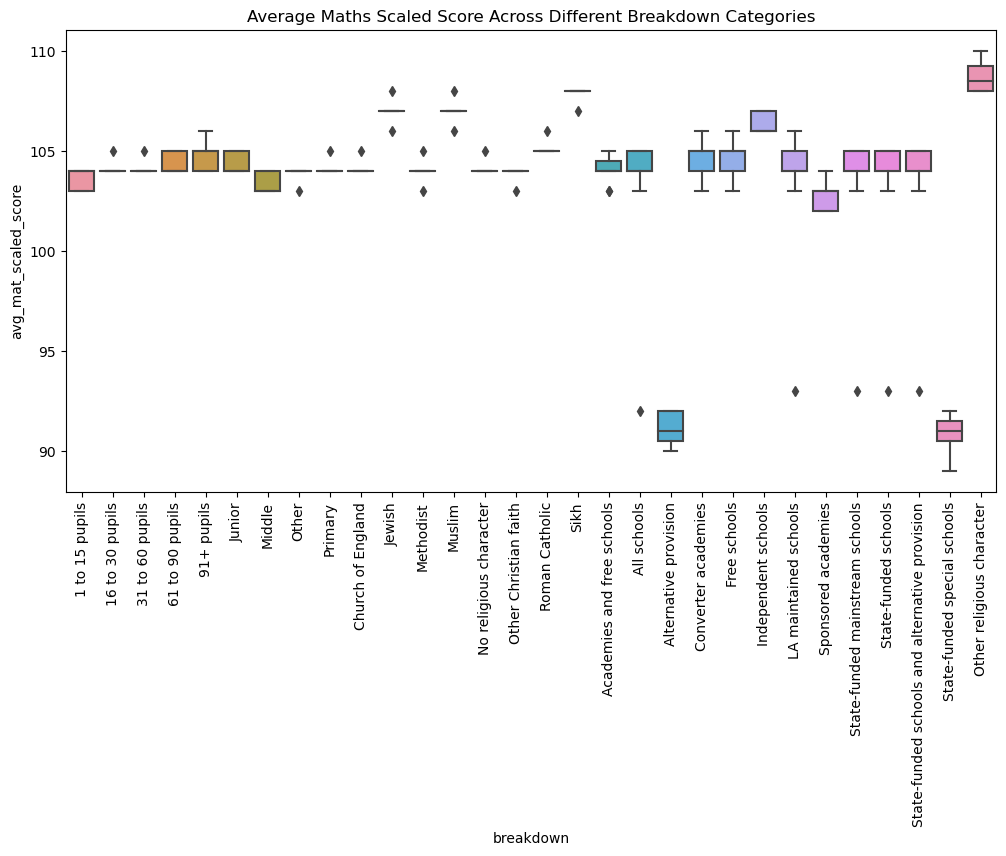

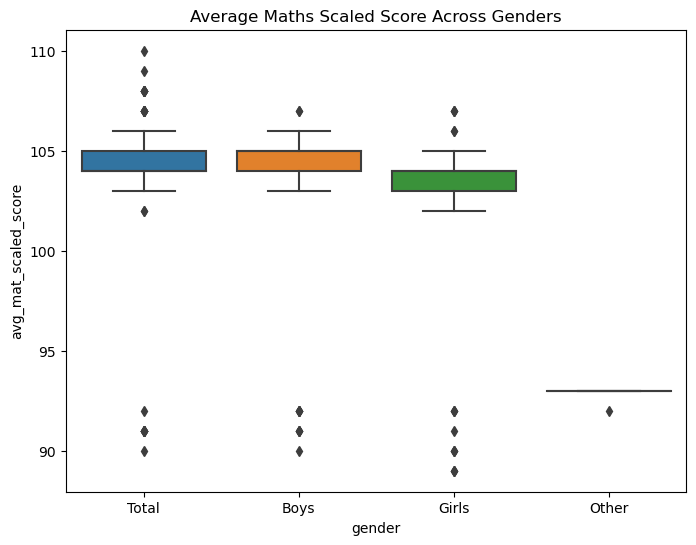

In [17]:
# Average Maths Scaled Score Across Different Breakdown Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='breakdown', y='avg_mat_scaled_score', data=data_reduced_cleaned)
plt.title("Average Maths Scaled Score Across Different Breakdown Categories")
plt.xticks(rotation=90)
plt.show()

# Average Maths Scaled Score Across Genders
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='avg_mat_scaled_score', data=data_reduced_cleaned)
plt.title("Average Maths Scaled Score Across Genders")
plt.show()


Gender Differences: There is a slight difference in maths scores between genders, with median scores and the spread of scores providing insights into performance disparities.

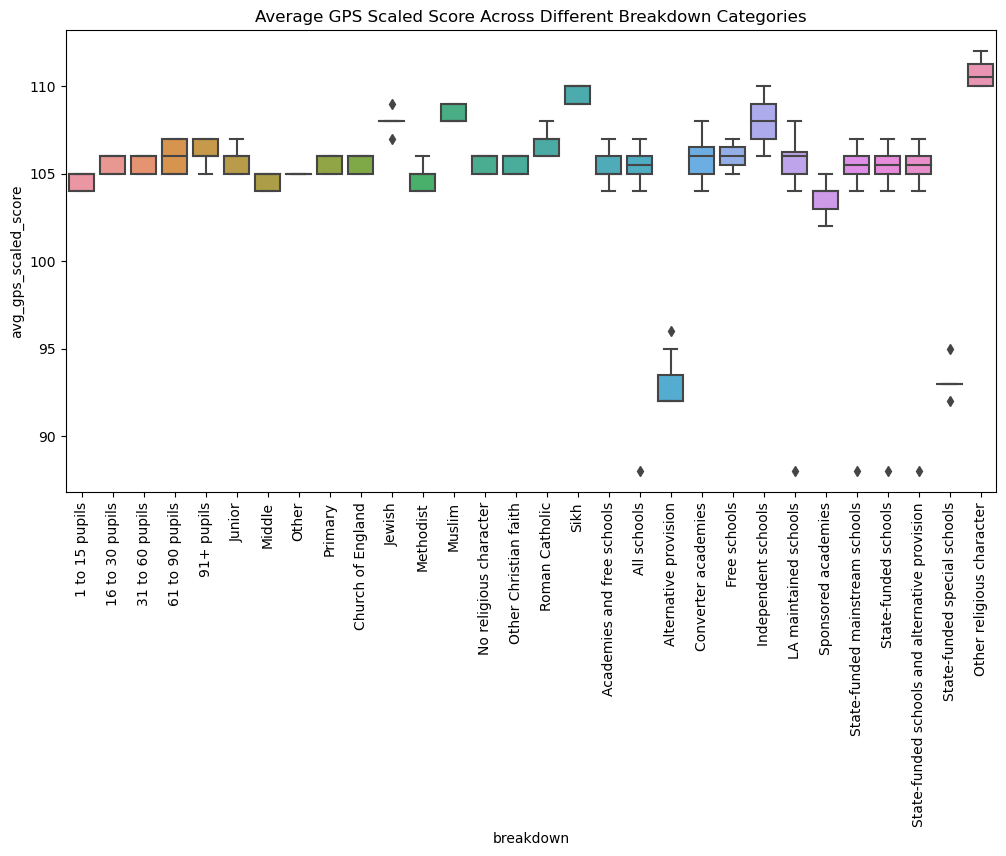

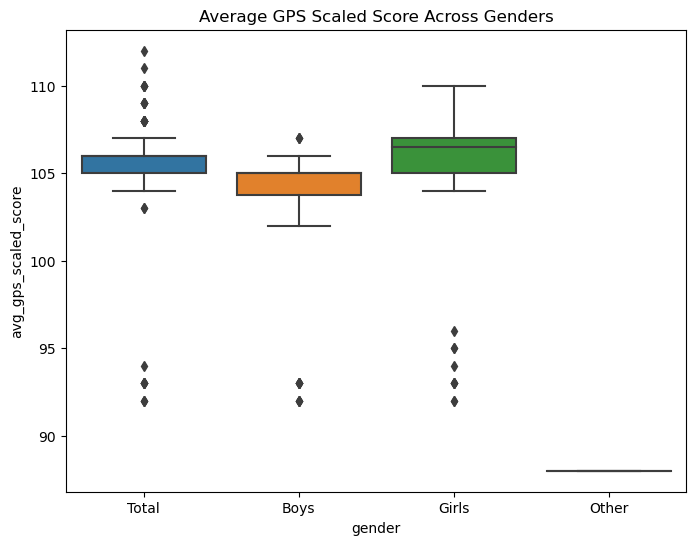

In [18]:
# Comparing average grammar, punctuation, and spelling scaled score across different breakdown categories and gender

# Average GPS Scaled Score Across Different Breakdown Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='breakdown', y='avg_gps_scaled_score', data=data_reduced_cleaned)
plt.title("Average GPS Scaled Score Across Different Breakdown Categories")
plt.xticks(rotation=90)
plt.show()

# Average GPS Scaled Score Across Genders
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='avg_gps_scaled_score', data=data_reduced_cleaned)
plt.title("Average GPS Scaled Score Across Genders")
plt.show()


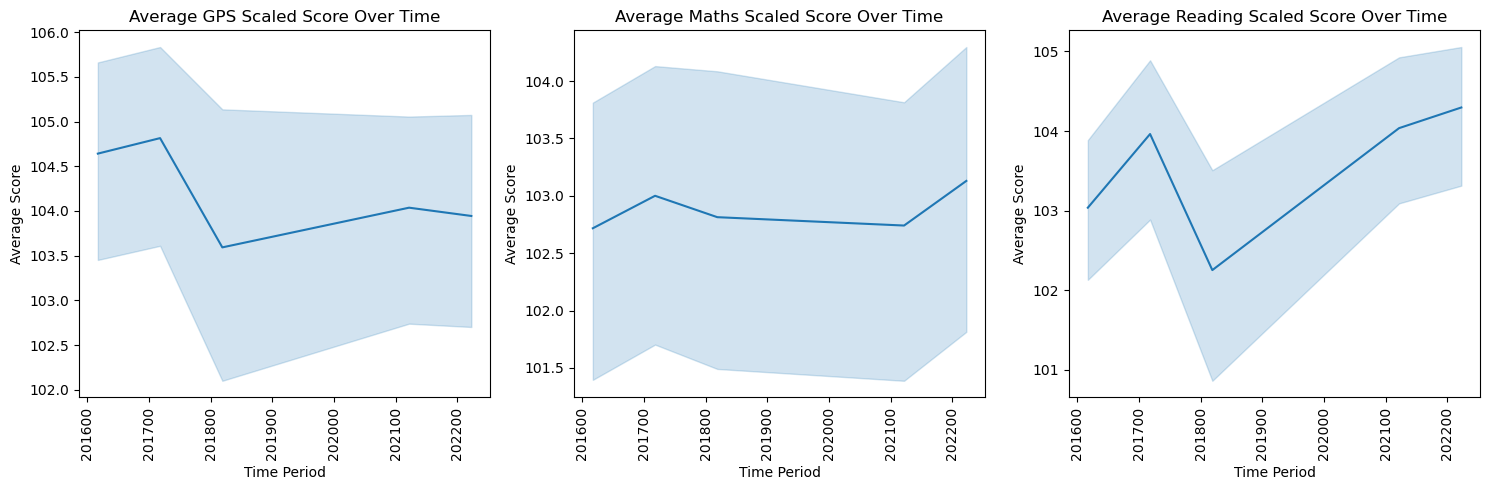

In [19]:
# Comparing average scores in different subjects over time
time_variable = 'time_period'
plt.figure(figsize=(15, 5))

# Average GPS Scaled Score Over Time
plt.subplot(1, 3, 1)
sns.lineplot(x=time_variable, y='avg_gps_scaled_score', data=data_reduced_cleaned)
plt.title("Average GPS Scaled Score Over Time")
plt.xlabel("Time Period")
plt.xticks(rotation=90)
plt.ylabel("Average Score")

# Average Maths Scaled Score Over Time
plt.subplot(1, 3, 2)
sns.lineplot(x=time_variable, y='avg_mat_scaled_score', data=data_reduced_cleaned)
plt.title("Average Maths Scaled Score Over Time")
plt.xlabel("Time Period")
plt.xticks(rotation=90)
plt.ylabel("Average Score")

# Average Reading Scaled Score Over Time
plt.subplot(1, 3, 3)
sns.lineplot(x=time_variable, y='avg_read_scaled_score', data=data_reduced_cleaned)
plt.title("Average Reading Scaled Score Over Time")
plt.xlabel("Time Period")
plt.xticks(rotation=90)
plt.ylabel("Average Score")

plt.tight_layout()
plt.show()


Variability Across School Types: Performance scores varied notably across different school types, suggesting that the type of school (e.g., state-funded, independent) has a significant impact on student performance.

Gender Differences: There were some observable differences in performance scores between genders, although these were not highly pronounced. This indicates a level of parity in performance across genders but with some disparities that could warrant further investigation.



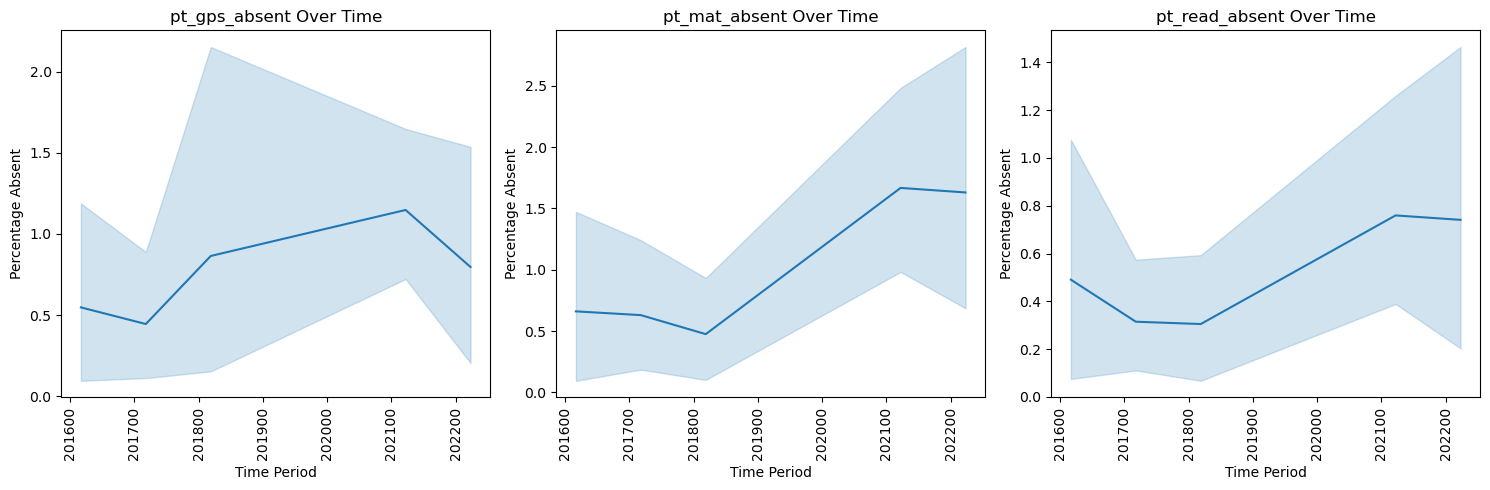

In [20]:
# Selecting variables related to attendance and absenteeism
attendance_variables = [
    'pt_gps_absent', 'pt_mat_absent', 'pt_read_absent'  
]
plt.figure(figsize=(15, 5))

for i, var in enumerate(attendance_variables):
    plt.subplot(1, 3, i + 1)
    sns.lineplot(x=time_variable, y=var, data=data_reduced_cleaned)
    plt.title(f"{var} Over Time")
    plt.xlabel("Time Period")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage Absent")

plt.tight_layout()
plt.show()


Stability in Performance Scores: Average performance scores in GPS, Maths, and Reading displayed relative stability over time, with no drastic fluctuations. This indicates a consistent level of academic achievement in these subjects across the studied periods.

Fluctuations in Absenteeism Rates: Absenteeism rates in all three subjects showed some fluctuations over time, but without a clear increasing or decreasing trend. This variability could be influenced by factors external to the school environment.

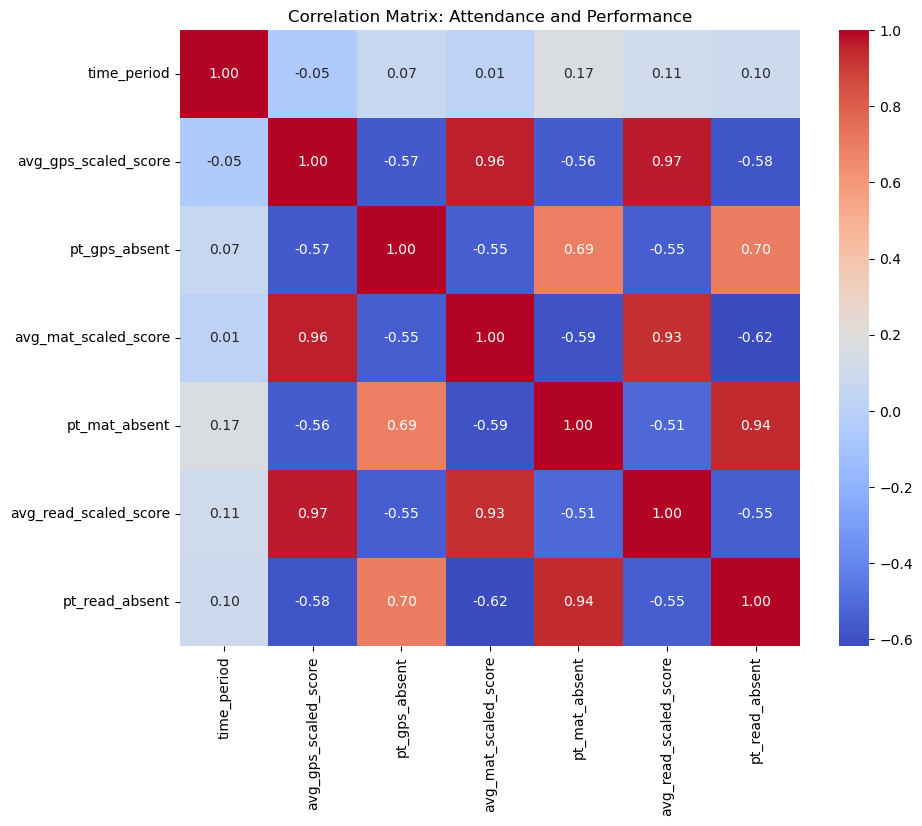

In [21]:
# Creating a new dataframe with selected attendance and performance variables
attendance_performance_data = data_reduced_cleaned[
    ['time_period', 'avg_gps_scaled_score', 'pt_gps_absent', 
     'avg_mat_scaled_score', 'pt_mat_absent', 
     'avg_read_scaled_score', 'pt_read_absent']
]

attendance_performance_corr = attendance_performance_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(attendance_performance_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Attendance and Performance")
plt.show()


Strong Negative Correlation in Maths: The correlation matrix revealed a notably strong negative correlation between absenteeism (pt_mat_absent) and average maths scaled score (avg_mat_scaled_score). This suggests that higher absenteeism in maths is significantly associated with lower performance scores in maths.

Moderate Negative Correlation in Reading and GPS: Both reading and GPS showed moderate negative correlations between absenteeism and performance. While absenteeism affects these subjects, the impact is less pronounced compared to maths.

Focus on Maths: Given the strong correlation between absenteeism and maths scores, interventions to reduce absenteeism could be particularly beneficial in improving maths performance.
Targeted Interventions: The variations across school types suggest that tailored strategies, considering the specific needs and challenges of different school types, could be more effective.

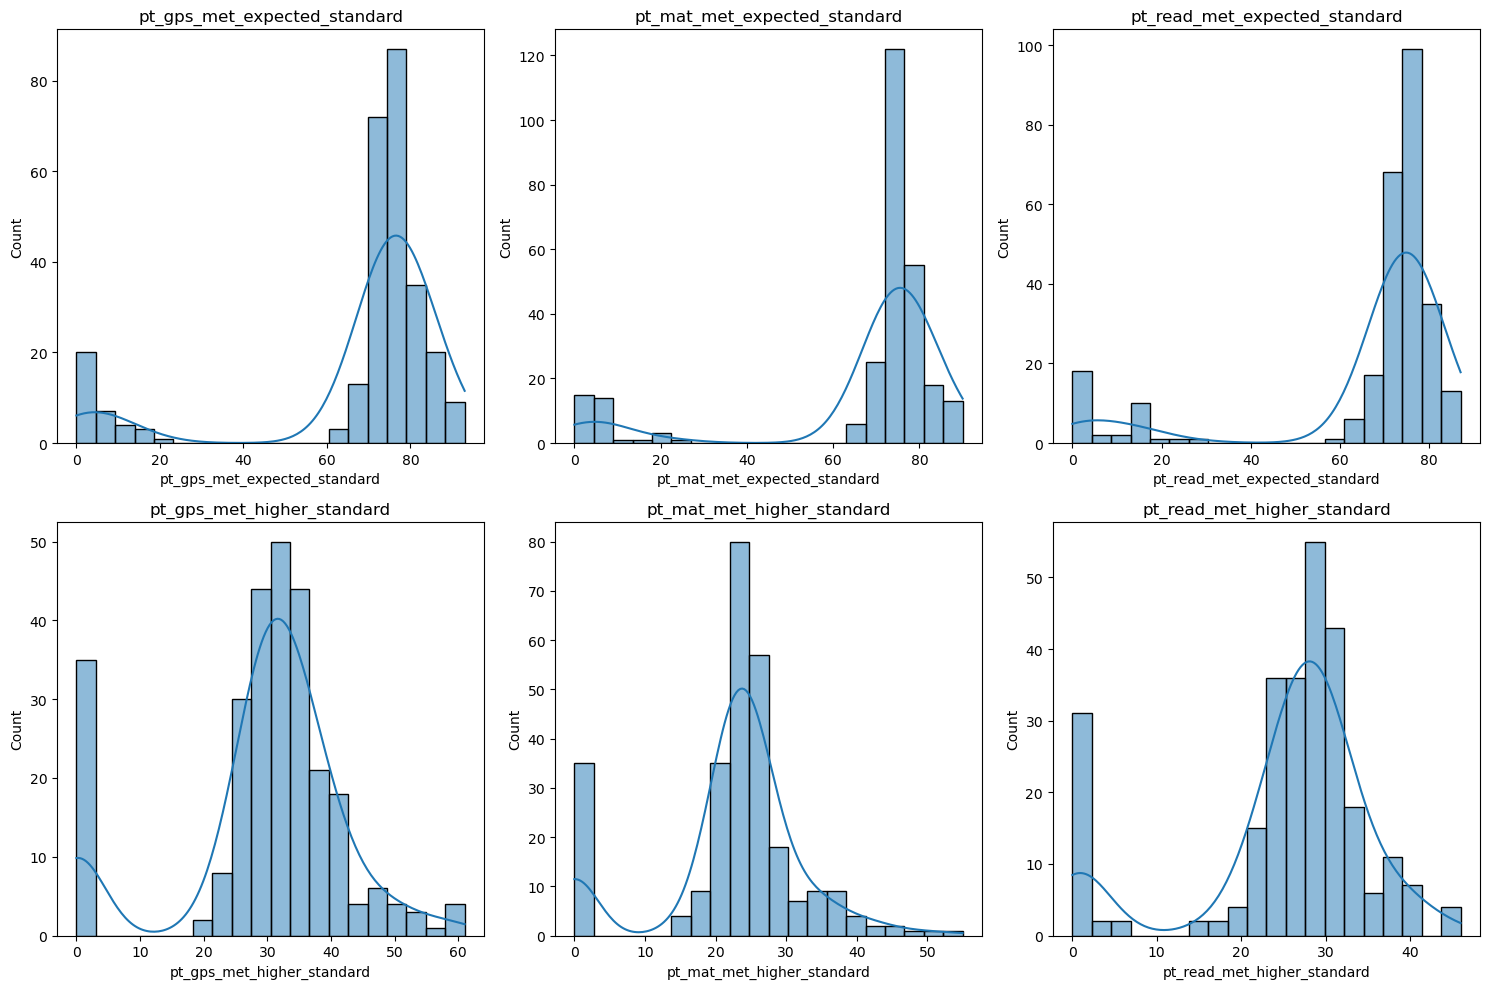

In [22]:
# Selecting percentage metrics related to performance in different subjects
percentage_performance_metrics = [
    'pt_gps_met_expected_standard', 'pt_mat_met_expected_standard', 'pt_read_met_expected_standard',  # Percentage meeting expected standard
    'pt_gps_met_higher_standard', 'pt_mat_met_higher_standard', 'pt_read_met_higher_standard'  # Percentage meeting higher standard
]
plt.figure(figsize=(15, 10))

for i, var in enumerate(percentage_performance_metrics):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_reduced_cleaned[var], kde=True, bins=20)
    plt.title(var)

plt.tight_layout()
plt.show()


The concentration of higher percentages in meeting expected standards across all subjects reflects positively on overall educational attainment.
The right-skewed distributions for meeting higher standards across subjects indicate that excelling to a higher standard is less common and potentially points to areas for targeted improvement or advanced learning opportunities.
Variability in these distributions, especially in reading, suggests differences in teaching effectiveness, resource allocation, or student engagement across schools.

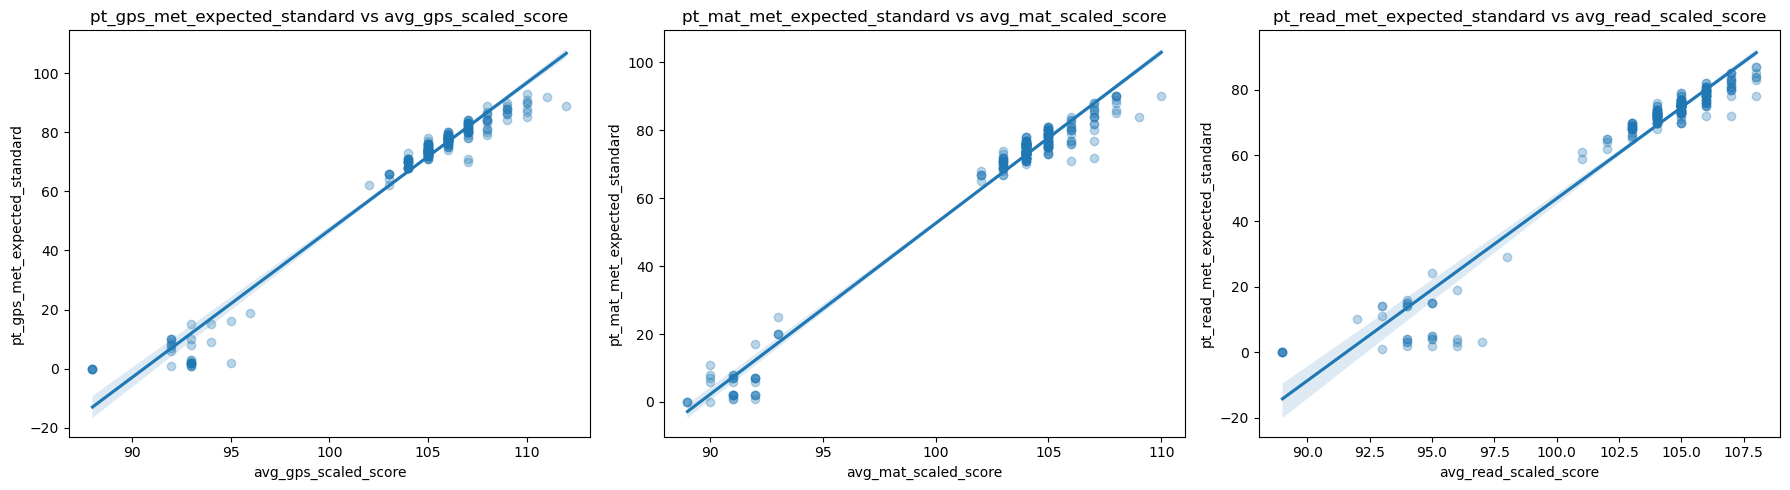

In [24]:
plt.figure(figsize=(18, 5))

def plot_scatter_with_reg(df, x, y, subplot_index):
    plt.subplot(1, 3, subplot_index)
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.3})
    plt.title(f'{y} vs {x}')

# Scatter plot for average GPS score vs percentage meeting expected GPS standard
plot_scatter_with_reg(data_reduced_cleaned, 'avg_gps_scaled_score', 'pt_gps_met_expected_standard', 1)

# Scatter plot for average Maths score vs percentage meeting expected Maths standard
plot_scatter_with_reg(data_reduced_cleaned, 'avg_mat_scaled_score', 'pt_mat_met_expected_standard', 2)

# Scatter plot for average Reading score vs percentage meeting expected Reading standard
plot_scatter_with_reg(data_reduced_cleaned, 'avg_read_scaled_score', 'pt_read_met_expected_standard', 3)

plt.tight_layout()
plt.show()


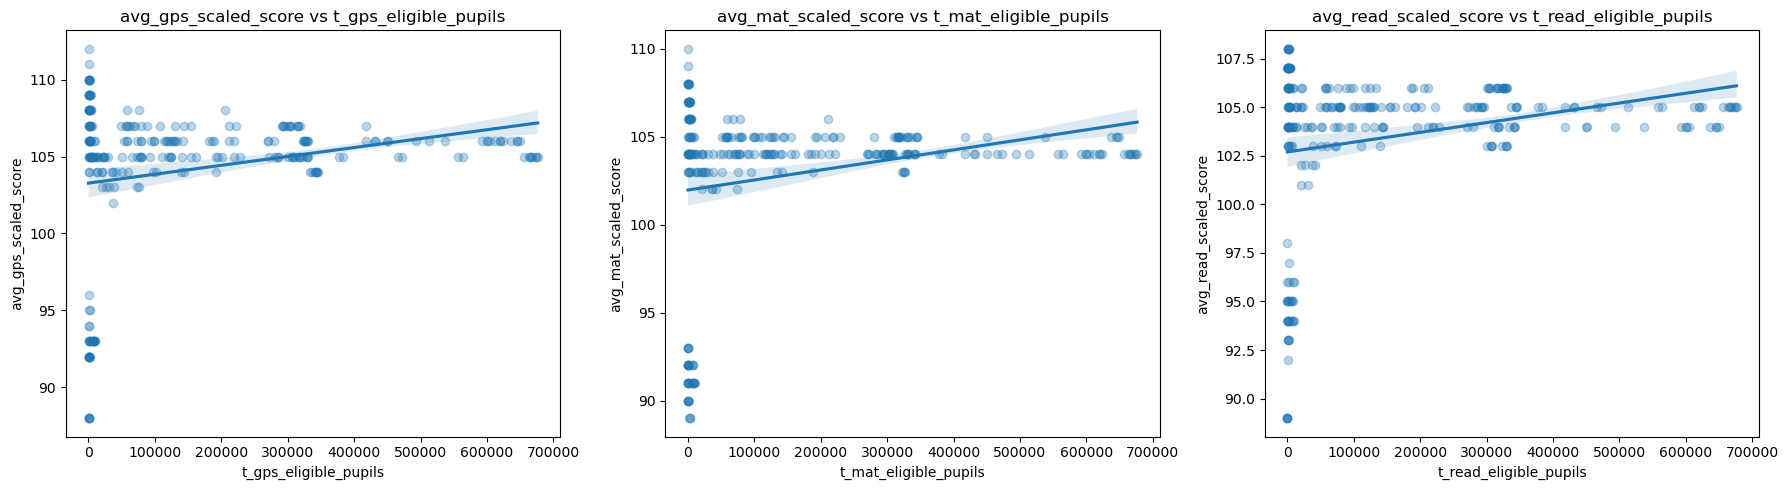

In [26]:
plt.figure(figsize=(18, 5))

# Defining a function to create a scatter plot with a regression line
def plot_scatter_with_reg(df, x, y, subplot_index):
    plt.subplot(1, 3, subplot_index)
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.3})
    plt.title(f'{y} vs {x}')

# Scatter plot for average GPS score vs percentage meeting expected GPS standard
plot_scatter_with_reg(data_reduced_cleaned, 't_gps_eligible_pupils', 'avg_gps_scaled_score', 1)

# Scatter plot for average Maths score vs percentage meeting expected Maths standard
plot_scatter_with_reg(data_reduced_cleaned, 't_mat_eligible_pupils', 'avg_mat_scaled_score', 2)

# Scatter plot for average Reading score vs percentage meeting expected Reading standard
plot_scatter_with_reg(data_reduced_cleaned, 't_read_eligible_pupils', 'avg_read_scaled_score', 3)

plt.tight_layout()
plt.show()

* School Size Not a Strong Predictor: Across all three subjects, the number of eligible pupils does not appear to be a strong predictor of average scaled scores. Both small and large schools show a range of performance levels.
* Variability Across Schools: The wide spread of scores across schools of different sizes indicates that factors other than just school size are influencing academic performance.
* Consistency Across Subjects: The absence of a clear trend in either direction for all three subjects suggests that the relationship between school size and academic performance is consistently weak across different academic areas.

## grouping by school

In [27]:
school_type_segments = data_reduced_cleaned['school_type'].unique()

school_type_analysis = {}

for school_type in school_type_segments:
    segment_data = data_reduced_cleaned[data_reduced_cleaned['school_type'] == school_type]
    descriptive_stats = segment_data[percentage_performance_metrics].describe()
    school_type_analysis[school_type] = descriptive_stats

school_type_analysis.keys(), list(school_type_analysis.values())[0] 

(dict_keys(['State-funded mainstream schools', 'Academies and free schools', 'All schools', 'Alternative provision', 'Converter academies', 'Free schools', 'Independent schools', 'LA maintained schools', 'Sponsored academies', 'State-funded schools', 'State-funded schools and alternative provision', 'State-funded special schools']),
        pt_gps_met_expected_standard  pt_mat_met_expected_standard  \
 count                    105.000000                    105.000000   
 mean                      77.571429                     76.790476   
 std                        9.472488                      7.772851   
 min                        0.000000                     20.000000   
 25%                       74.000000                     73.000000   
 50%                       78.000000                     76.000000   
 75%                       80.000000                     80.000000   
 max                       93.000000                     90.000000   
 
        pt_read_met_expected_stan

* Expected Standard Attainment: A high mean percentage of students meet the expected standard across subjects, indicating generally good performance. However, the wide range, especially in GPS and Reading, suggests performance variability across different schools within this category.
* Higher Standard Attainment: Fewer students meet the higher standard, with the average percentage lower than that for the expected standard. This indicates a potential area for targeted improvement, especially in Maths, where the mean percentage is the lowest.

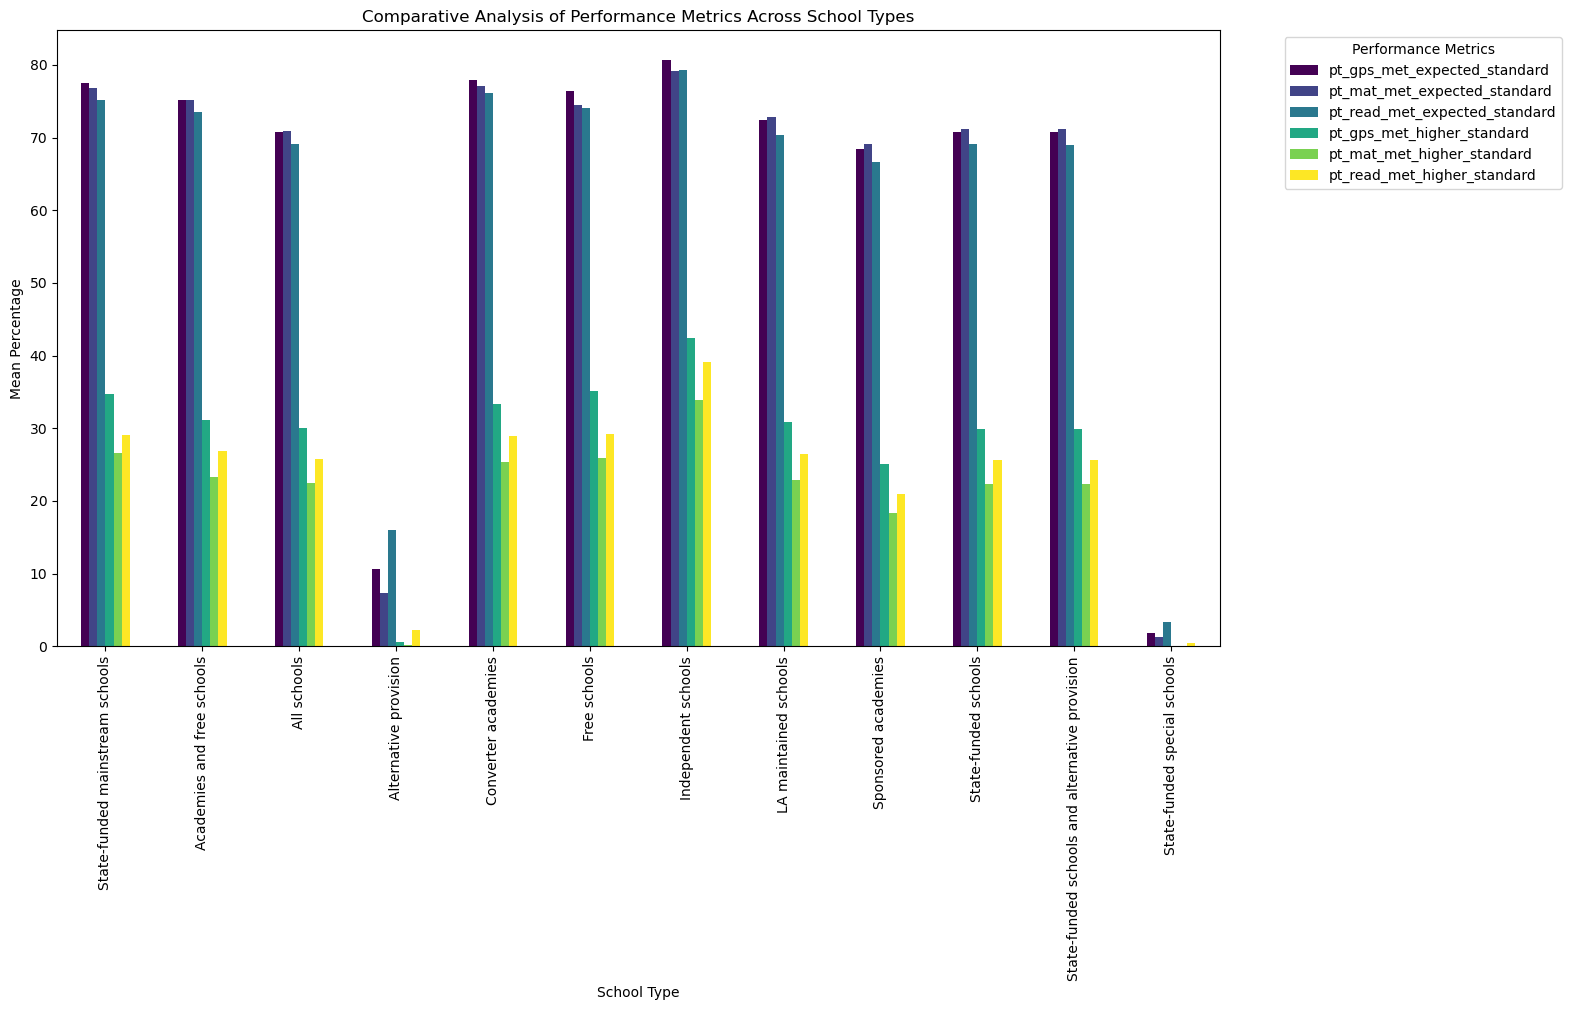

In [29]:
# Preparing data for comparative analysis across different school types
performance_metrics_means = {
    school_type: data_reduced_cleaned[data_reduced_cleaned['school_type'] == school_type][percentage_performance_metrics].mean()
    for school_type in school_type_segments
}

performance_metrics_means_df = pd.DataFrame(performance_metrics_means).transpose()
performance_metrics_means_df.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title("Comparative Analysis of Performance Metrics Across School Types")
plt.xlabel("School Type")
plt.ylabel("Mean Percentage")
plt.xticks(rotation=90)
plt.legend(title="Performance Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Best Performing School Types: independent schools, academies show higher overall performance compared to others. 

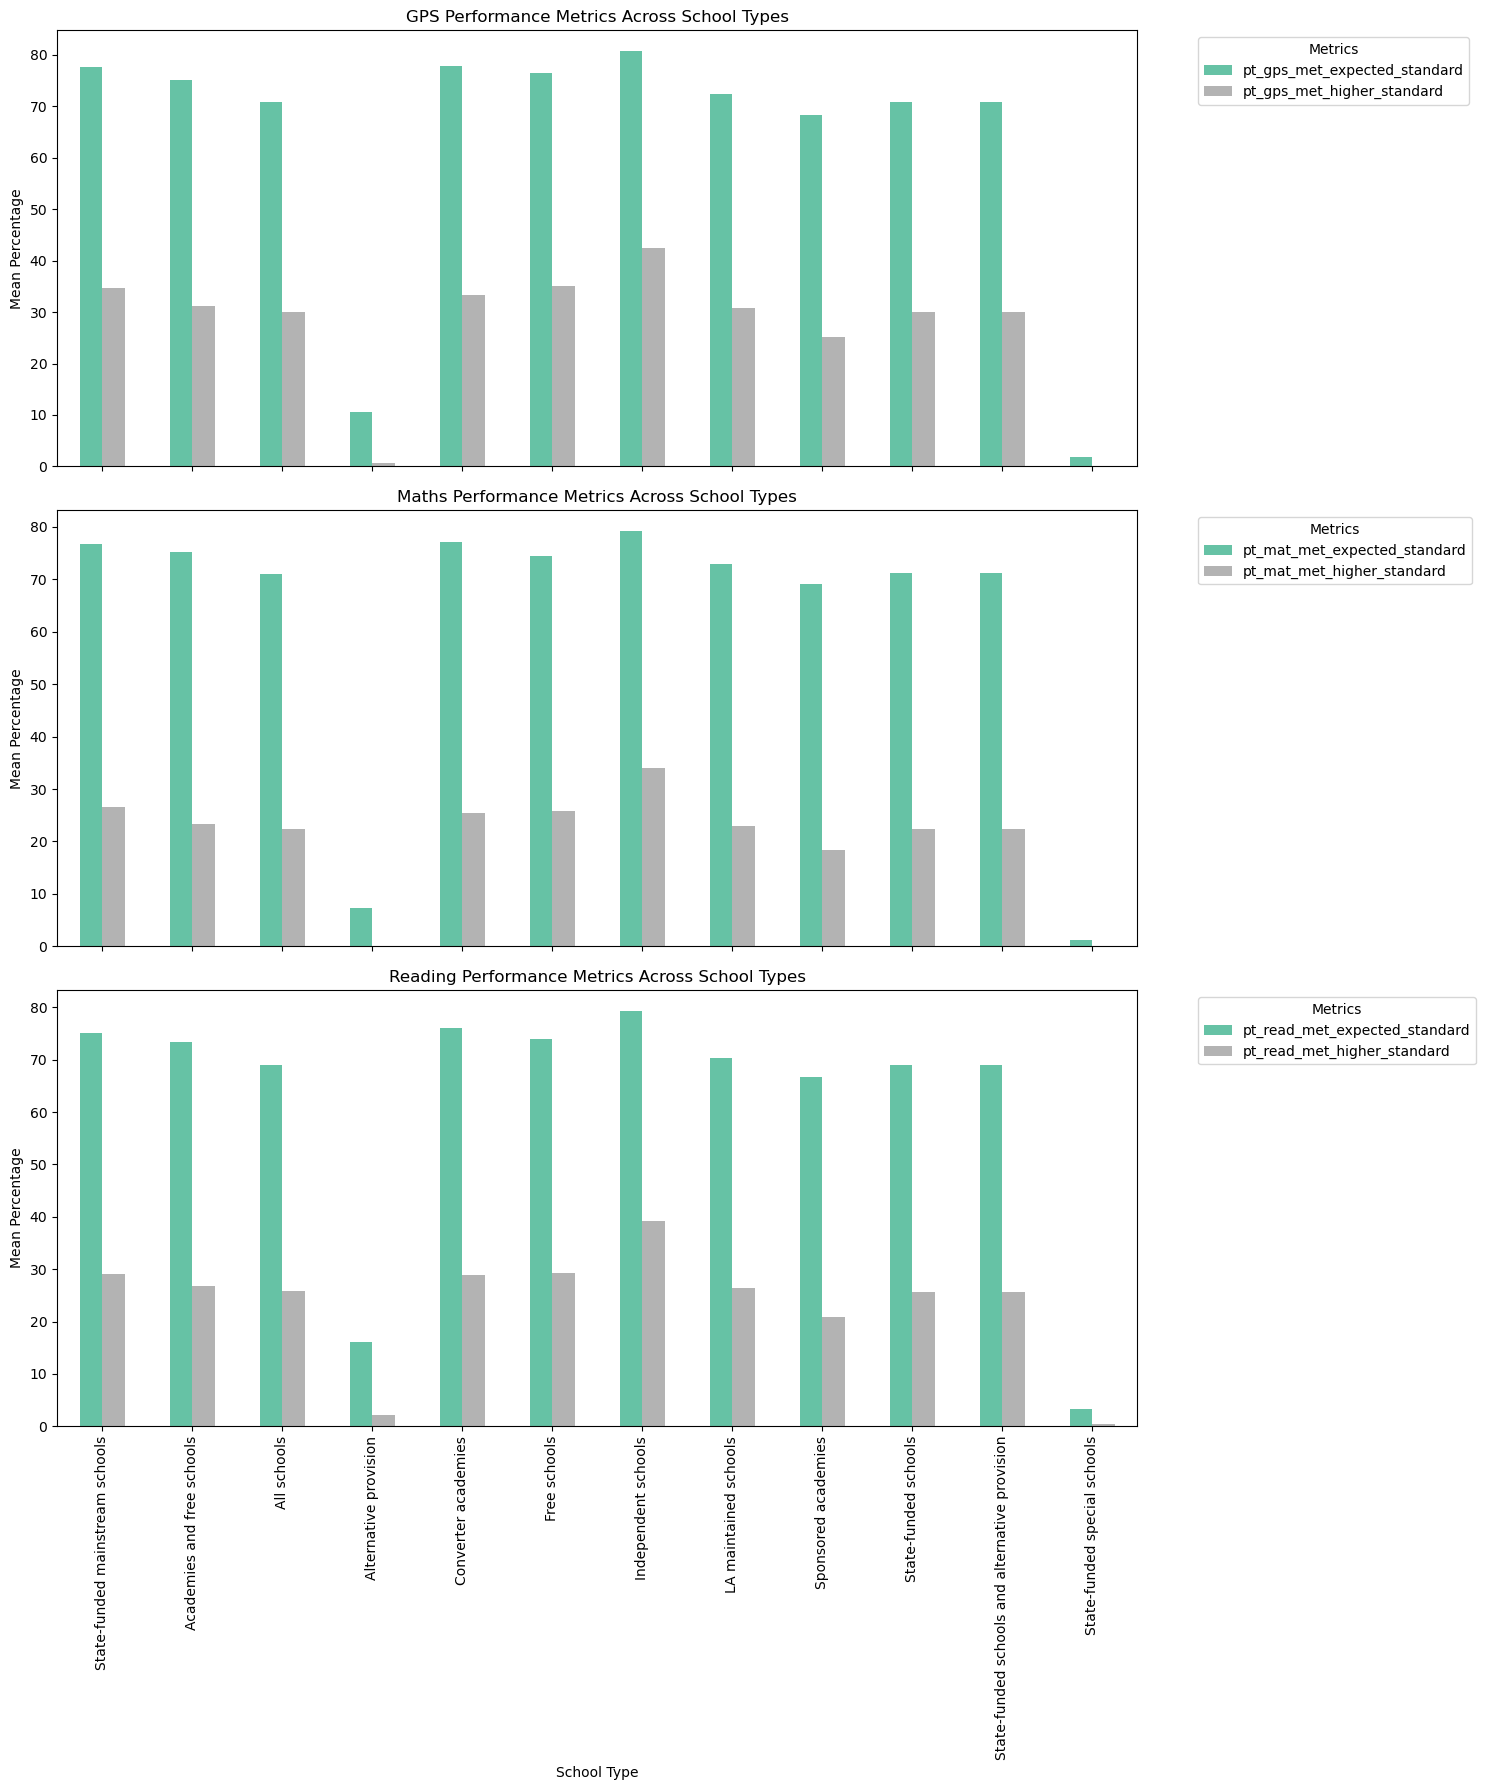

In [30]:
# Preparing data for subject-specific comparative analysis
subject_metrics = {
    'GPS': ['pt_gps_met_expected_standard', 'pt_gps_met_higher_standard'],
    'Maths': ['pt_mat_met_expected_standard', 'pt_mat_met_higher_standard'],
    'Reading': ['pt_read_met_expected_standard', 'pt_read_met_higher_standard']
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18), sharex=True)

for i, (subject, metrics) in enumerate(subject_metrics.items()):
    subject_df = performance_metrics_means_df[metrics]
    subject_df.plot(kind='bar', ax=axes[i], colormap='Set2')
    axes[i].set_title(f"{subject} Performance Metrics Across School Types")
    axes[i].set_ylabel("Mean Percentage")
    axes[i].legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("School Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [31]:
# Identifying the top and bottom performers in each subject
top_bottom_performers = {}

for subject, metrics in subject_metrics.items():
    for metric in metrics:
        # Top performer for the metric
        top_performer = performance_metrics_means_df[metric].idxmax()
        top_value = performance_metrics_means_df[metric].max()

        # Bottom performer for the metric
        bottom_performer = performance_metrics_means_df[metric].idxmin()
        bottom_value = performance_metrics_means_df[metric].min()

        top_bottom_performers[(subject, metric)] = {
            "Top Performer": (top_performer, top_value),
            "Bottom Performer": (bottom_performer, bottom_value)
        }

top_bottom_performers



{('GPS',
  'pt_gps_met_expected_standard'): {'Top Performer': ('Independent schools',
   80.73333333333333), 'Bottom Performer': ('State-funded special schools',
   1.8666666666666667)},
 ('GPS',
  'pt_gps_met_higher_standard'): {'Top Performer': ('Independent schools',
   42.4), 'Bottom Performer': ('State-funded special schools', 0.0)},
 ('Maths',
  'pt_mat_met_expected_standard'): {'Top Performer': ('Independent schools',
   79.2), 'Bottom Performer': ('State-funded special schools',
   1.2666666666666666)},
 ('Maths',
  'pt_mat_met_higher_standard'): {'Top Performer': ('Independent schools',
   33.93333333333333), 'Bottom Performer': ('State-funded special schools',
   0.0)},
 ('Reading',
  'pt_read_met_expected_standard'): {'Top Performer': ('Independent schools',
   79.33333333333333), 'Bottom Performer': ('State-funded special schools',
   3.2666666666666666)},
 ('Reading',
  'pt_read_met_higher_standard'): {'Top Performer': ('Independent schools',
   39.13333333333333), 'Bottom

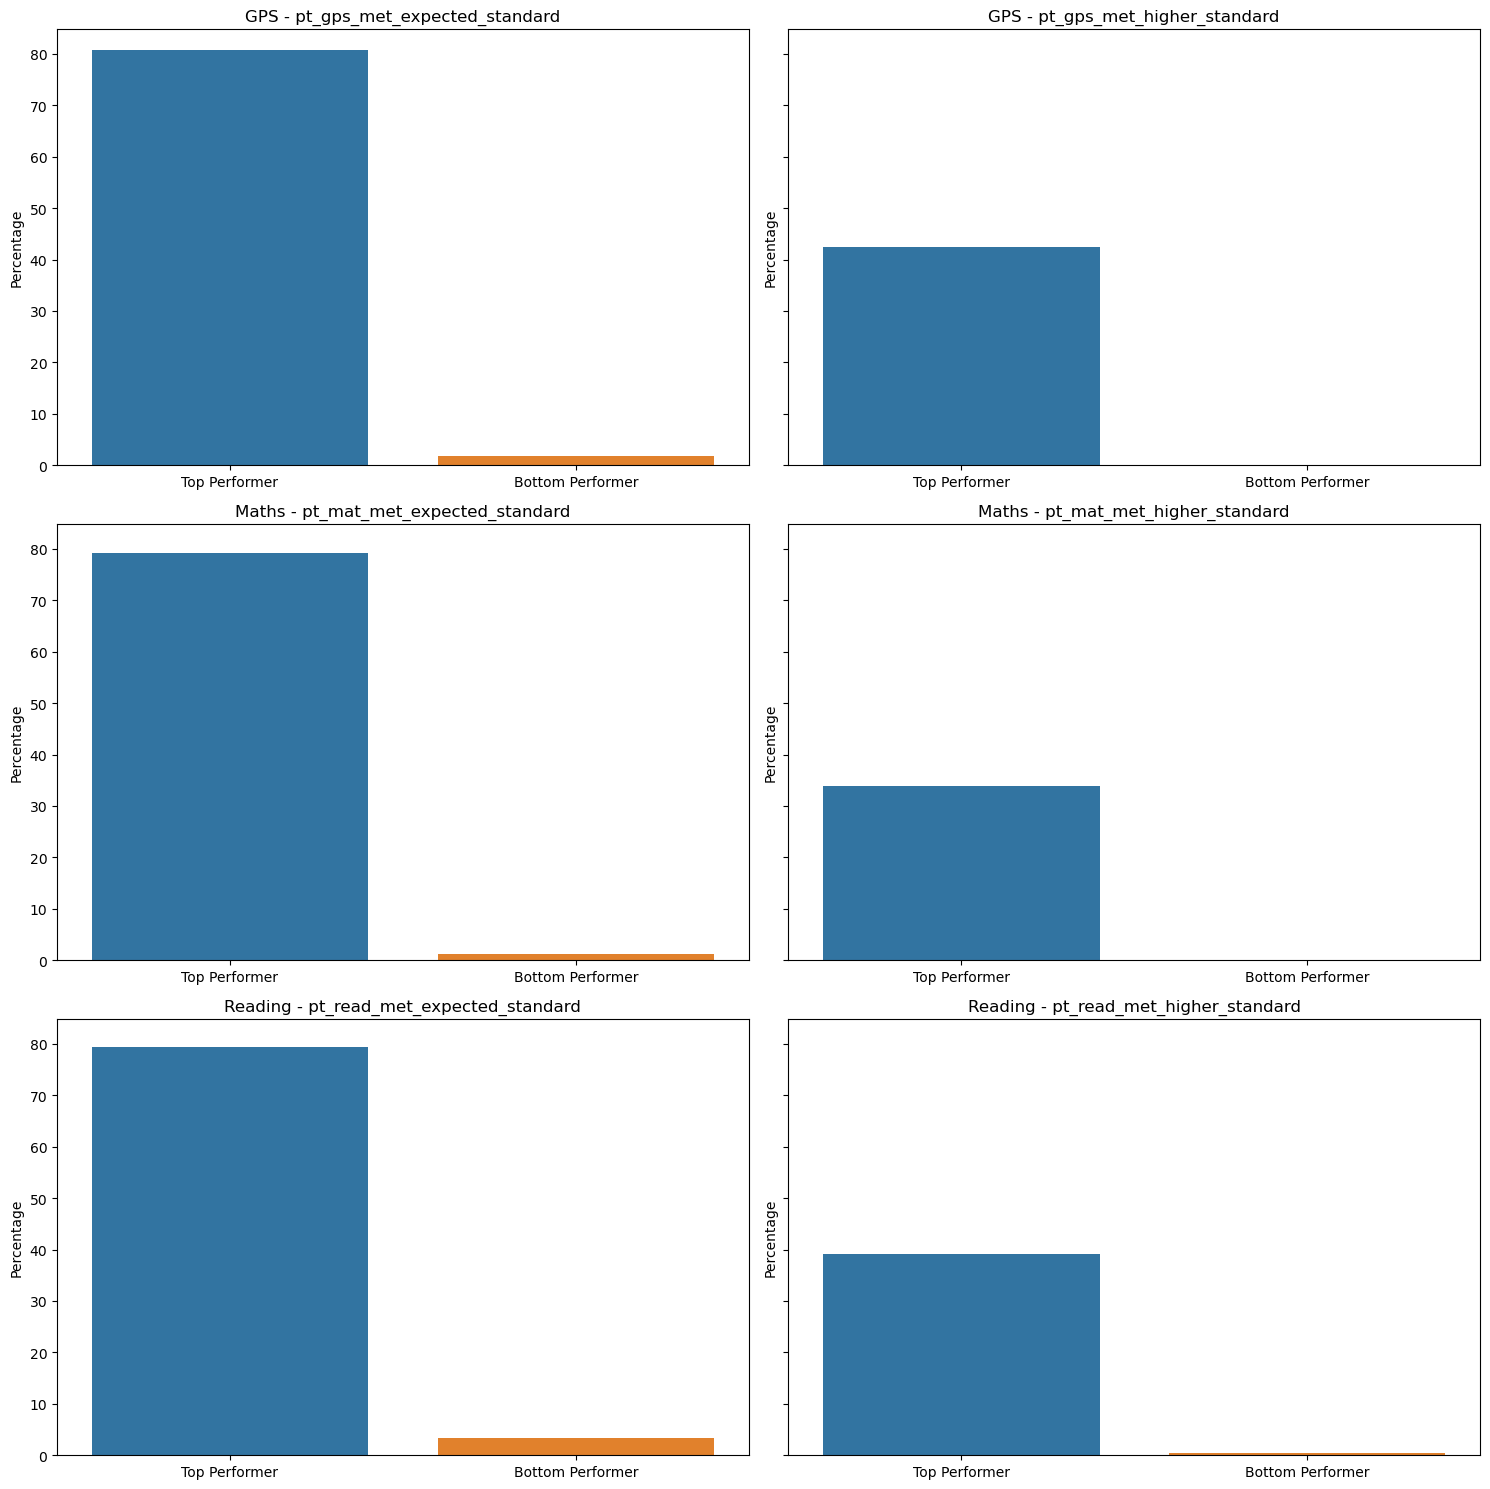

In [32]:
plot_data = {
    (subject, metric): {
        "School Type": ["Top Performer", "Bottom Performer"],
        "Performance": [top_bottom_performers[(subject, metric)]["Top Performer"][1],
                        top_bottom_performers[(subject, metric)]["Bottom Performer"][1]]
    }
    for subject, metrics in subject_metrics.items()
    for metric in metrics
}

# Plotting the top and bottom performers for each performance metric
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey=True)

for i, ((subject, metric), data) in enumerate(plot_data.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.barplot(x="School Type", y="Performance", data=pd.DataFrame(data), ax=ax)
    ax.set_title(f"{subject} - {metric}")
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()


* Significant Performance Gap: The plots clearly highlight a significant gap in performance between the top (independent schools) and bottom (state-funded special schools) performers across all subjects and metrics.
* Consistency in Independent Schools: Independent schools consistently show high performance in meeting both expected and higher standards.
* Challenges in State-Funded Special Schools: The performance in state-funded special schools is notably lower, indicating the challenges faced in these settings.

In [33]:
# Preparing data for cross-subject correlation analysis within each school type
cross_subject_correlations = {}

for school_type in school_type_segments:
    # Filter data for the current school type
    segment_data = data_reduced_cleaned[data_reduced_cleaned['school_type'] == school_type]

    # Calculate the correlation matrix for performance metrics in this segment
    correlation_matrix = segment_data[percentage_performance_metrics].corr()

    # Storing the correlation matrix
    cross_subject_correlations[school_type] = correlation_matrix

example_school_type = list(cross_subject_correlations.keys())[0]
cross_subject_correlations[example_school_type]


,pt_gps_met_expected_standard,pt_mat_met_expected_standard,pt_read_met_expected_standard,pt_gps_met_higher_standard,pt_mat_met_higher_standard,pt_read_met_higher_standard
pt_gps_met_expected_standard,1.000000,0.961375,0.912456,0.811612,0.724052,0.739641
pt_mat_met_expected_standard,0.961375,1.000000,0.850619,0.852094,0.821952,0.734030
pt_read_met_expected_standard,0.912456,0.850619,1.000000,0.616516,0.564427,0.842022
pt_gps_met_higher_standard,0.811612,0.852094,0.616516,1.000000,0.914963,0.667395
pt_mat_met_higher_standard,0.724052,0.821952,0.564427,0.914963,1.000000,0.664438
pt_read_met_higher_standard,0.739641,0.734030,0.842022,0.667395,0.664438,1.000000


* Consistency in School Performance: The strong correlations across subjects suggest that schools often perform consistently across different academic areas. High-performing schools in one subject are likely to be high-performing in others.
* Implications for School Strategies: This finding may indicate that factors contributing to success or challenges in schools are likely to be systemic and not subject-specific. School-wide strategies, resources, teaching quality, and student support systems might play crucial roles.


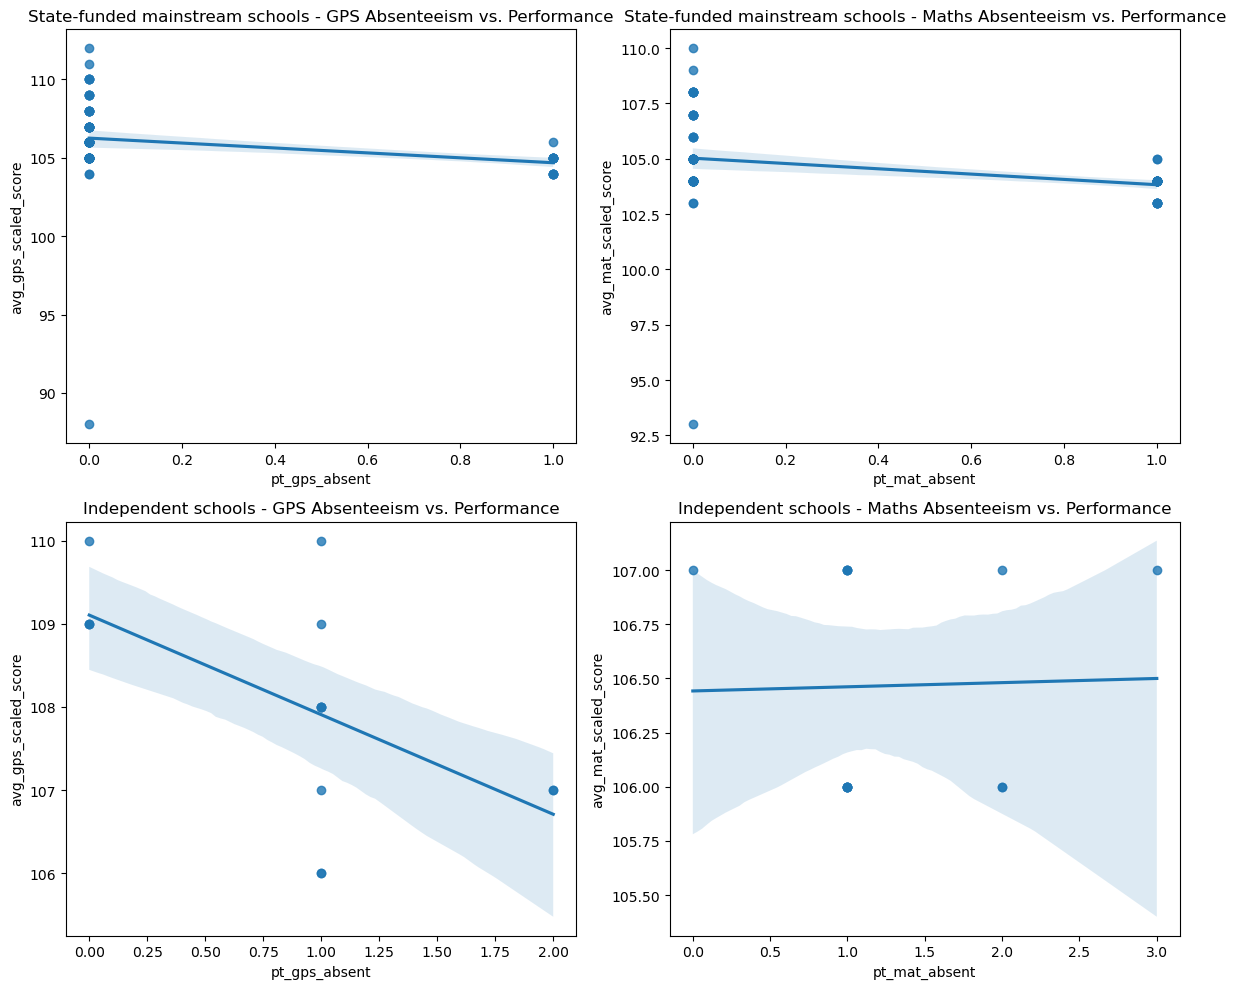

,pt_gps_absent,avg_gps_scaled_score,pt_mat_absent,avg_mat_scaled_score
pt_gps_absent,1.000000,-0.233098,0.686393,-0.228159
avg_gps_scaled_score,-0.233098,1.000000,-0.312666,0.935637
pt_mat_absent,0.686393,-0.312666,1.000000,-0.286195
avg_mat_scaled_score,-0.228159,0.935637,-0.286195,1.000000


In [34]:
# selecting a general subset of school types and focusing on key variables
selected_school_types = ['State-funded mainstream schools', 'Independent schools']
selected_variables = ['pt_gps_absent', 'avg_gps_scaled_score', 'pt_mat_absent', 'avg_mat_scaled_score']

# Calculating correlation coefficients and plotting scatter plots for the selected variables and school types
simplified_correlation_results = {}
fig, axes = plt.subplots(nrows=len(selected_school_types), ncols=2, figsize=(12, 10))

for i, school_type in enumerate(selected_school_types):
    segment_data = data_reduced_cleaned[data_reduced_cleaned['school_type'] == school_type]
    correlation_matrix = segment_data[selected_variables].corr()
    simplified_correlation_results[school_type] = correlation_matrix

    sns.regplot(x='pt_gps_absent', y='avg_gps_scaled_score', data=segment_data, ax=axes[i, 0])
    axes[i, 0].set_title(f"{school_type} - GPS Absenteeism vs. Performance")
    
    sns.regplot(x='pt_mat_absent', y='avg_mat_scaled_score', data=segment_data, ax=axes[i, 1])
    axes[i, 1].set_title(f"{school_type} - Maths Absenteeism vs. Performance")

plt.tight_layout()
plt.show()
simplified_correlation_results[selected_school_types[0]]


In [35]:
# Investigating the interaction between variables like gender and school type on performance metrics

interaction_vars = ['gender', 'school_type']
performance_metrics_interaction = ['avg_gps_scaled_score', 'avg_mat_scaled_score', 'avg_read_scaled_score']

interaction_data = data_reduced_cleaned[interaction_vars + performance_metrics_interaction]
interaction_analysis_results = {}

for performance_metric in performance_metrics_interaction:
    grouped_data = interaction_data.groupby(interaction_vars)[performance_metric].mean().unstack()
    interaction_analysis_results[performance_metric] = grouped_data

example_metric = performance_metrics_interaction[0]
interaction_analysis_results[example_metric]


school_type,Academies and free schools,All schools,Alternative provision,Converter academies,Free schools,Independent schools,LA maintained schools,Sponsored academies,State-funded mainstream schools,State-funded schools,State-funded schools and alternative provision,State-funded special schools
gender,,,,,,,,,,,,
Boys,104.6,104.6,92.2,104.6,105.2,106.6,105.0,102.8,104.600000,104.6,104.6,93.0
Girls,106.4,106.6,94.0,106.8,106.8,109.4,106.8,104.6,106.600000,106.6,106.6,93.2
Other,NaN,88.0,NaN,NaN,NaN,NaN,88.0,NaN,88.000000,88.0,88.0,NaN
Total,105.6,105.6,92.6,105.8,106.0,108.2,105.8,103.6,106.255319,105.6,105.6,93.0


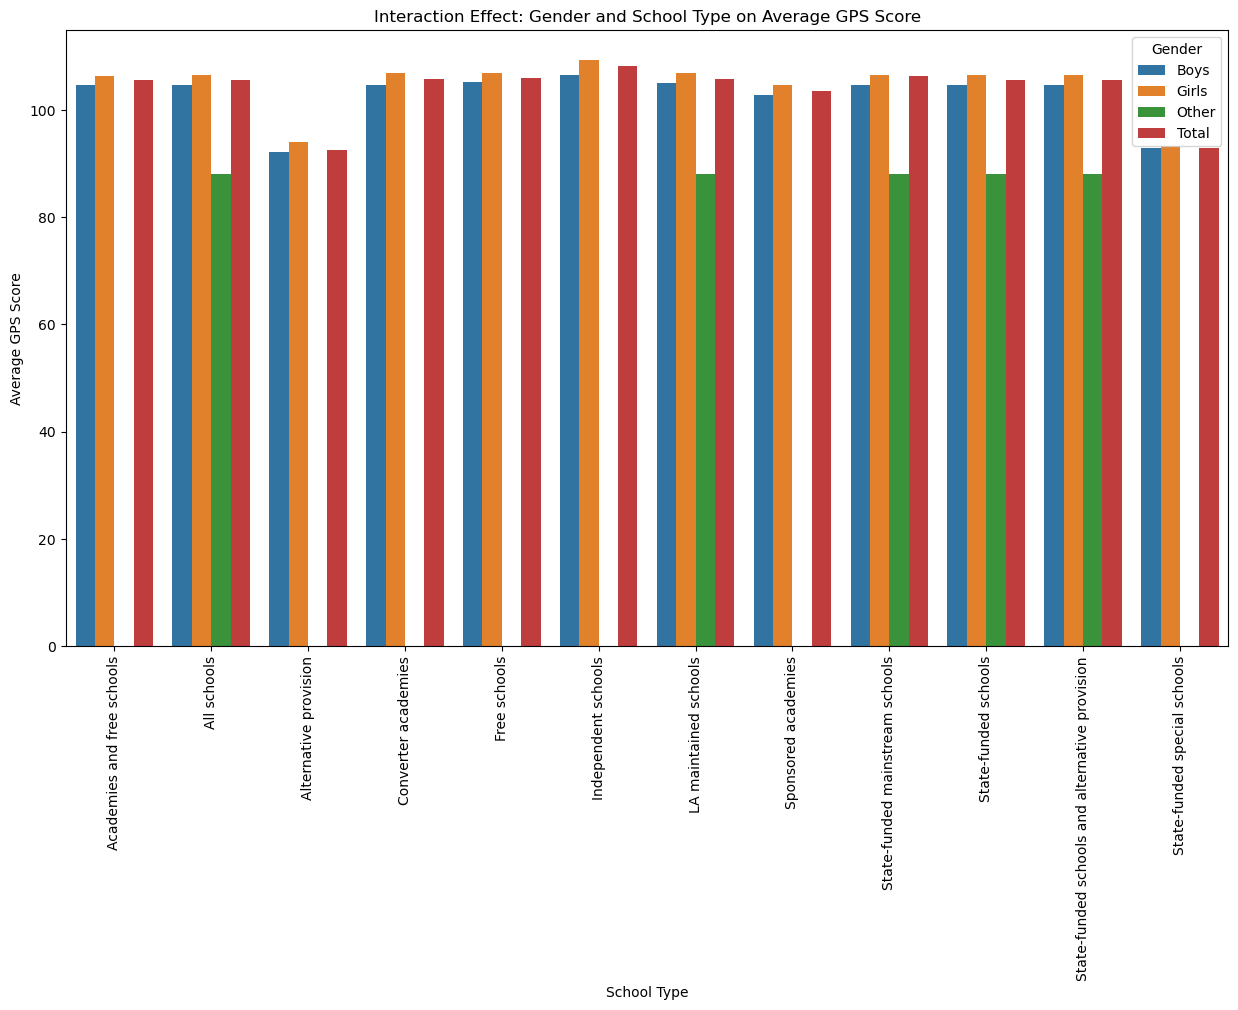

In [36]:
# Plotting the interaction effect analysis results as grouped bar charts for GPS performance
gps_interaction_plot_data = interaction_analysis_results['avg_gps_scaled_score'].reset_index()

gps_interaction_melted = gps_interaction_plot_data.melt(id_vars='gender', var_name='School Type', value_name='Avg GPS Score')

plt.figure(figsize=(15, 8))
sns.barplot(x='School Type', y='Avg GPS Score', hue='gender', data=gps_interaction_melted)
plt.title("Interaction Effect: Gender and School Type on Average GPS Score")
plt.xticks(rotation=90)
plt.xlabel("School Type")
plt.ylabel("Average GPS Score")
plt.legend(title="Gender")
plt.show()


Independent Schools' Advantage: Independent schools consistently show higher performance, regardless of gender, highlighting the potential impact of resources, teaching methods, or student demographics in these schools.
Challenges in Alternative Provision and Special Schools: The lower performance in alternative provision and state-funded special schools, especially among boys, suggests a need for targeted interventions in these settings